In [1]:
from tensor.operation.generate import coil100_data, random_tensor
import threading
import time
import matplotlib.pyplot as plt
try:
    import wget
except:
    %pip install wget

from tensor.decomposition.cpals import CP_ALS
from tensor.decomposition.cprand import CP_RAND


## Time per iteration

In [2]:
cpals_avg_time = []
cprand_avg_time = []
n = 2 # number of times to run the experiment for taking average
l, w, s = 200, 250, 10

for I in range(l, w, s):
    X  = random_tensor(3, (I,I,I), 7, 0.01)
    start = time.time()
    for _ in range(n):
       CP_ALS.decompose(X, 5, max_iter=100, eps=0.01, init_type="random", check_convergence=False)
    end = time.time()
    cpals_avg_time.append((end-start)/(n*100))

    start = time.time()
    for _ in range(n):
        CP_RAND.decompose(X, 5, max_iter=100, eps=0.01, init_type="random", check_convergence=False)
    end = time.time()
    cprand_avg_time.append((end-start)/(n*100))
    print(f"For I = {I}, CP_ALS avg time = {cpals_avg_time[-1]}, CP_RAND avg time = {cprand_avg_time[-1]}")


For I = 200, CP_ALS avg time = 0.5364918982982636, CP_RAND avg time = 0.15165013909339906
For I = 210, CP_ALS avg time = 0.6280603909492493, CP_RAND avg time = 0.15755019545555116
For I = 220, CP_ALS avg time = 0.6076714849472046, CP_RAND avg time = 0.16056275129318237
For I = 230, CP_ALS avg time = 0.9011083817481995, CP_RAND avg time = 0.1687044632434845
For I = 240, CP_ALS avg time = 1.1377624070644379, CP_RAND avg time = 0.1871463143825531


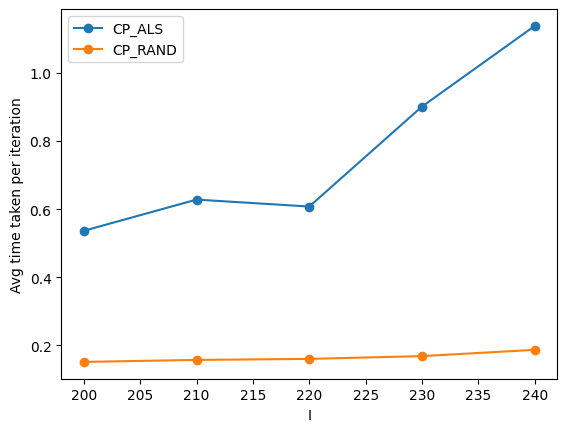

In [3]:

plt.plot(range(l,w,s), cpals_avg_time, 'o-')    
plt.plot(range(l,w,s), cprand_avg_time, 'o-')
plt.legend(["CP_ALS", "CP_RAND"])
plt.xlabel("I")
plt.ylabel("Avg time taken per iteration")
plt.show()
